# Analysis of Student Alcohol Consumption
<b>Ben Aranoff, Natan Oliff, Elisheva Zak</b>

# Introduction

In the paper <a href="http://www3.dsi.uminho.pt/pcortez/student.pdf">Using Data Mining to Predict
Secondary School Student Performance</a>, authors Paulo Cortez and Alice Silva discuss the problems in education in Portugal, specifically with respect to the high levels of failing students in Mathematics and Portegese classes.

Gabriel Pereira and Mousinho da Silveira are two secondary schools in Portugal. 

We reccomend coding Python 3, as we did. We used multiple imported libraries, primarily: <a href="https://pandas.pydata.org/pandas-docs/stable/">pandas</a>, <a href = "https://docs.scipy.org/doc/numpy/user/">numpy</a>, <a href = "https://matplotlib.org/contents.html">matplotlib</a>, <a href = "https://scikit-learn.org/stable/index.html">scikit-learn</a>, and <a href = "https://seaborn.pydata.org/">seaborn</a>.

In [1]:
# In order to complete this tutorial, you will need these libraries
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn import linear_model
import seaborn as sns
from numpy.polynomial.polynomial import polyfit
import statsmodels.api as sm
import statsmodels.formula.api as smf

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


Our tutorial focuses specifically on students in a portugese class, however, there is also data on students in a math class. We decided to look only at the portugese class for our analysis. This is because there are duplicate students between the two classes, and if you decided to use both data sets you would have to merge duplicates or take into account during your analysis that there are duplicates. Because of this, and because the total amount of students once duplicates have been merged is not significantly higher than the number of students in the portugese class, we decided to use the portugese set for our analysis. However, when you are analyzing the data, feel free to choose whatever data you want, as long as you keep the duplicates in mind.

In [2]:
data = pd.read_csv("student-por.csv")

# Tidying the Data
Our table has a lot of columns, which is great for us, since we want as much information as possible so we can atttempt to find as many interesting correlations as possible. However, our table can be a bit confusing, so for a full explanation of each column and what it includes, please visit <a href="https://www.kaggle.com/uciml/student-alcohol-consumption">Student Alcohol Consumption Data</a> (which is the source of our data).

## Drop irrelevant columns
* Because there are so many columns, we will not end up using all of them in this tutorial, so for clarity we have dropped the ones we did not use. When your perform your analysis, you may decide you want to use certain columns that we have dropped, and then you can drop whichever columns you do not use.

In [3]:
# data = data.drop(["address",'reason','health'])

## Rename vague columns
* Although we previously linked an explanation for each column and what it contains, there were still some column titles that we felt were unintuitive, so we gave them clearer names. You can rename any columns whose names you think are vague or mislabelled.
* Often when performing analysis it is easier to use numbers than strings, and many columns here have a binary answer of either 'yes' or 'no'. Replace those with 1s and 0s so that they will be easier to analyze later.

In [4]:
data = data.rename(columns={"goout": 'social_activity', 'Pstatus' : 'parental_status', 'Dalc' : 'Weekday_alc', 'Walc' : 'Weekend_alc'})
data = data.replace('yes', 1).replace('no', 0)

In [5]:
data.head()

,school,sex,age,address,famsize,parental_status,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,social_activity,Weekday_alc,Weekend_alc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


# EDA

## Profile socioeconomic status Natan
* M/Fedu
* M/Fjob
* internet access
* nursery
* paid

## Alcohol use Ben
* by age
* by gender
* by ses
* by sp
* by grades

## Grades Ben
* by gender
* by ses
* by sp

## Social participation
* We attempt to quantify a student's social experience between 1 and 7, where 1 is the least socially active and 7 is the most. This is based on a student's romantic status, their extra-curricular particiaption, and their social activities outside of school.

* First, look at the quantity of students who participate in each social activity.

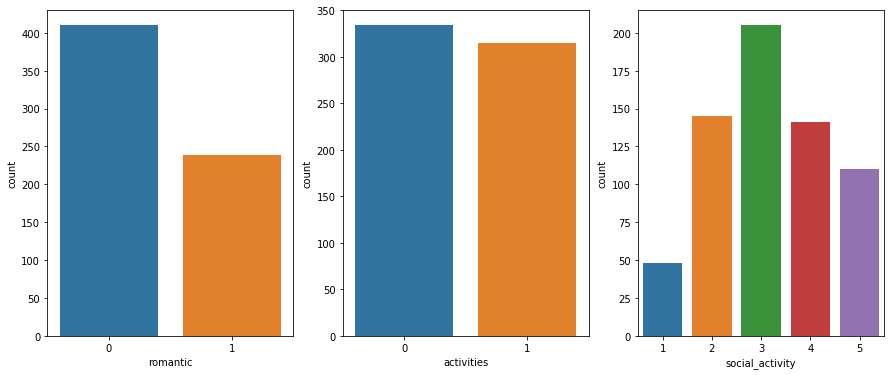

In [6]:
fig, ax = plt.subplots(1,3, figsize=(15,6))
sns.countplot(x='romantic', data=data, ax=ax[0])
sns.countplot(x='activities', data=data, ax=ax[1])
sns.countplot(x='social_activity', data=data, ax=ax[2])

* In order to clarify different correlations between each possible social activity, we looked at a violin plot of each combination of social activities.

Text(0.5, 1.0, 'romantic status vs extra-curriculars')

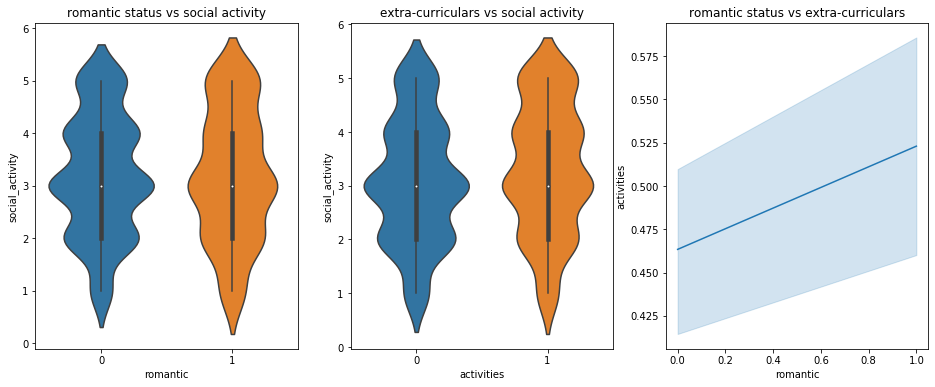

In [7]:
fig, ax = plt.subplots(1,3, figsize=(16,6))
sns.violinplot(x='romantic', y='social_activity', data=data, ax=ax[0]).set_title('romantic status vs social activity')
sns.violinplot(x='activities', y= 'social_activity', data=data, ax=ax[1]).set_title('extra-curriculars vs social activity')
sns.lineplot(x='romantic',y='activities', data=data, ax=ax[2]).set_title('romantic status vs extra-curriculars')

* Next, add a column in our data table that will keep track of each student's total social participation, which we can later use to analyze social participation as a whole and its affect on other variables.

In [8]:
data['social_participation'] = data['romantic'] + data['activities'] + data['social_activity']
data.head()

,school,sex,age,address,famsize,parental_status,Medu,Fedu,Mjob,Fjob,...,freetime,social_activity,Weekday_alc,Weekend_alc,health,absences,G1,G2,G3,social_participation
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,3
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,2
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,4
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,2


## Correlations to Weekend Alcohol Use 

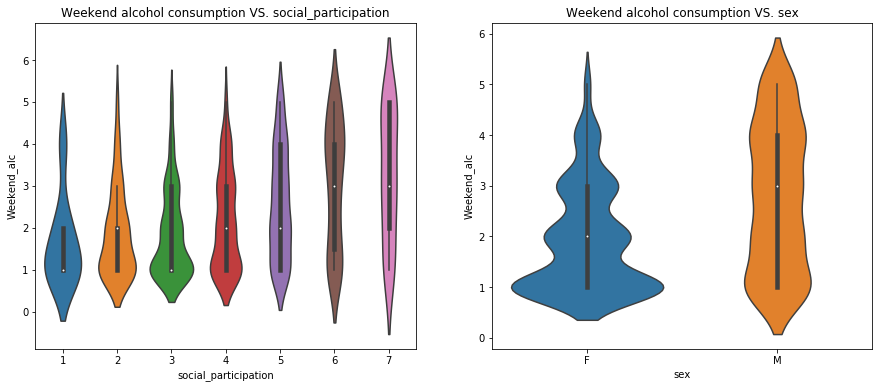

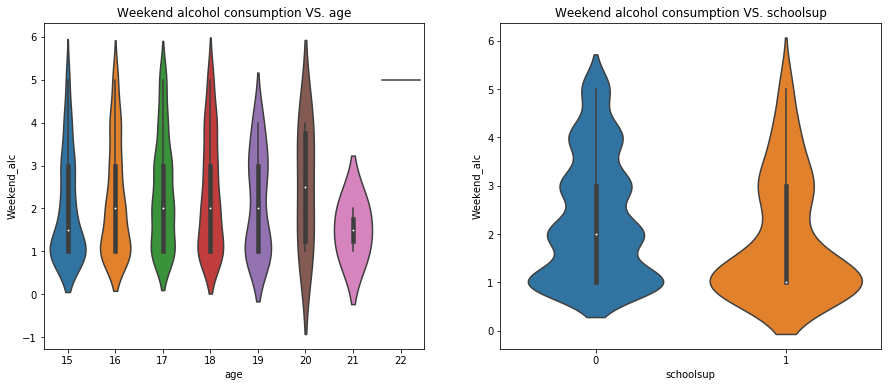

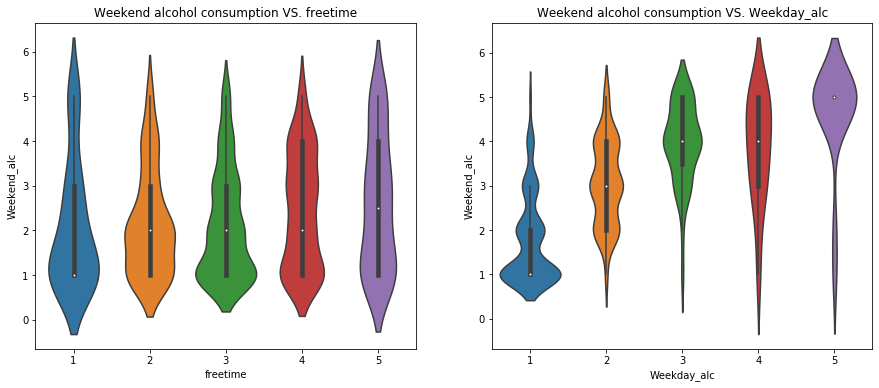

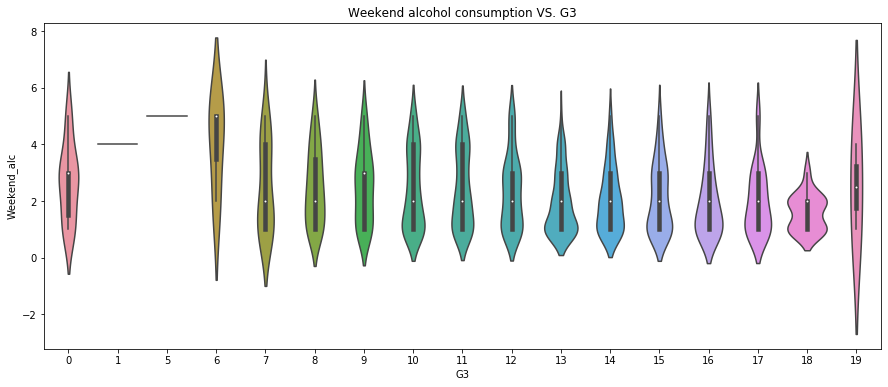

In [9]:
i=0
time = 1
fig, ax = plt.subplots(1,2, figsize=(15,6))
for col in ['social_participation','sex','age','schoolsup','freetime','Weekday_alc','G3']:
    x = col
    y = data.Weekend_alc
    if time != 4:
        sns.violinplot(x=data[x], y=y, ax=ax[i]).set_title("Weekend alcohol consumption VS. " + col)
    else :
        sns.violinplot(x=data[x], y=y).set_title("Weekend alcohol consumption VS. " + col)

    i+=1
    if i == 2 and time != 4:
        i=0
        time+=1
        if time == 4:
            fig, ax = plt.subplots(figsize=(15,6))
        else :
            fig, ax = plt.subplots(1,2, figsize=(15,6))

## Correlations to Grades


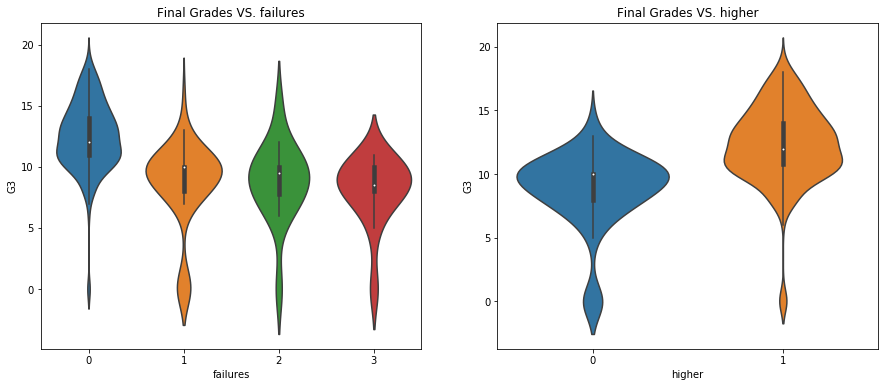

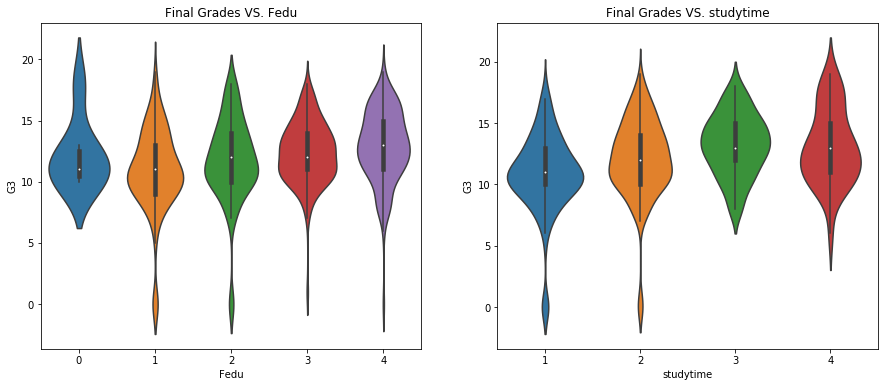

In [10]:
i=0
check = True
fig, ax = plt.subplots(1,2, figsize=(15,6))
for col in ['failures','higher','Fedu','studytime']:
    x = col
    y = data.G3
    sns.violinplot(x=data[x], y=y, ax=ax[i]).set_title("Final Grades VS. " + col)
    i+=1
    if i == 2 and check:
        check = False
        i=0
        fig, ax = plt.subplots(1,2, figsize=(15,6))

# Machine Learning
## social participation, ses  predicts alcohol
## alcohol, sp, ses predicts grades